In [115]:
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

In [116]:
mnist_url = "https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz"
urllib.request.urlretrieve(mnist_url, "mnist.npz")

# Load the npz file
data = np.load("mnist.npz")

In [117]:
train_images = data['x_train']
train_labels = data['y_train']

num_labels = len(np.unique(train_labels))
num_train_images = len(train_images)
print("Number of unique labels:", num_labels)
print("Size of training set:", num_train_images)


Number of unique labels: 10
Size of training set: 60000


In [118]:
train_images = train_images.reshape(train_images.shape[0], -1)
num_features = train_images.shape[1]
print("Number of pixels in each image:", num_features)

Number of pixels in each image: 784


In [119]:
X = []
for i in range(num_labels):
    counter = 0
    for j in range(num_train_images):
        if train_labels[j] == i:
            counter += 1
            X.append(train_images[j])
        
        if counter == 100:
            break
X = np.array(X)
X = X.T
X.shape

(784, 1000)

In [120]:
mean = np.mean(X, axis=1)
X_cen = (X.T - mean.T).T
X_cen.shape

(784, 1000)

In [121]:
S = X_cen @ X_cen.T
S = S / 999
S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(S)

sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]
U = np.array(sorted_eigenvectors)
U

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [123]:
Y = (U.T) @ X_cen
X_recon = U @ Y
X_recon

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [124]:
def mean_squared_error(matrix1, matrix2):
    # Calculate the squared difference between corresponding elements
    squared_diff = (matrix1 - matrix2) ** 2
    
    # Calculate the mean squared error
    mse = np.mean(squared_diff)
    
    return mse

In [125]:
MSE = mean_squared_error(X_cen, X_recon)
print(MSE)

1.4250197019517972e-26


In [126]:
def give_Up(p):
    return U[:, :p]

In [127]:
def reconstructImage(p):
    Up = U[:, :p]
    Yp = Up.T @ X_cen
    image_recon = Up @ Yp
    print(Yp.shape)
    image_recon = (image_recon.T + mean.T).T
    image_recon = image_recon.reshape(28, 28, 1000)
    return image_recon

In [128]:
def plotImage(p):
    image_recon = reconstructImage(p)
    offset = 0
    plt.figure(figsize=(15, 10))
    for i in range(10):
        for j in range(5):
            plt.subplot(10, 5, i * 5 + j + 1)  # Corrected subplot index calculation
            plt.imshow(image_recon[:, :, j + offset], cmap='gray')
            plt.axis('off')
            plt.title("Class {}".format(i))
        offset += 100

    plt.tight_layout()
    plt.show()

(5, 1000)


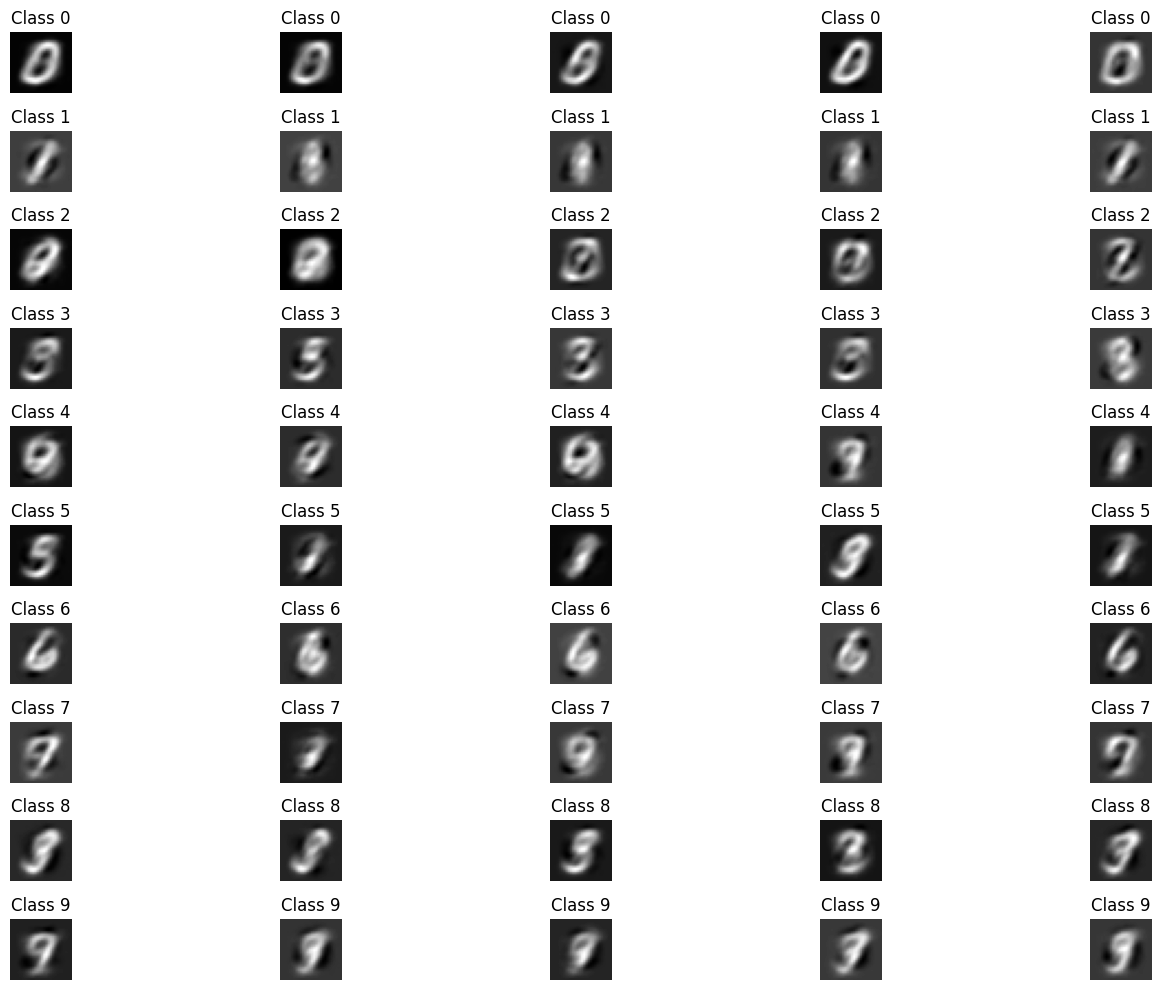

In [129]:
p = 5
plotImage(p)
#Change the value of the parameter p in the range [1, 784] to produce different results

In [130]:
train_images = data['x_train']
train_images = train_images.reshape(-1, 784).T
mean_X_test = np.mean(train_images, axis=1, keepdims=True)
X_train_cen = train_images - mean_X_test

In [131]:
Up = give_Up(p)
Yp = Up.T @ X_train_cen
Yp = Yp.T
Yp.shape


(60000, 5)

In [132]:
class_means = []
class_inv_covs = []
for i in range(num_labels):
    mask = (train_labels == i)
    selected_rows = Yp[mask]
    # print(selected_rows)
    mean = np.mean(selected_rows, axis=0)
    cov = np.cov(selected_rows, rowvar=False)
    class_means.append(mean)
    inv_cov = np.linalg.pinv(cov)
    class_inv_covs.append(inv_cov)

class_means = np.array(class_means)
class_inv_covs = np.array(class_inv_covs)
print(class_means.shape)
for i in class_means:
    print(i)

(10, 5)
[997.79585276  90.67664919 129.98198119  83.41650467 245.42667178]
[-783.00153958  425.6267493  -110.83160858 -164.24974833  -23.33709126]
[  82.97718943  270.73452425 -157.99781514 -366.86256399  335.60714607]
[  78.5814963   470.10957521  407.55500624  171.8382514  -190.61461589]
[ -91.17083895 -534.95996971 -140.68329615  -48.98584646  106.23841852]
[ 138.70433503  134.53214633  112.05115535  151.37774802 -224.30390697]
[ 218.46944947 -151.9475882  -222.13723357 -652.7816802  -255.45463003]
[-291.88488256 -514.06524867   17.50851895  404.93232675   76.85091923]
[-30.12190267 265.71146258 -29.23705354 202.48686607  -3.1665501 ]
[-187.32661351 -494.33975759    1.74826862  227.36418372  -81.20172449]


In [133]:
def QDA(x, mean, inv, priori):
    ans = - 0.5 * ((x @ inv @ (x.T)) - 2 * (mean @ inv @ (x.T)) + (mean @ inv @ (mean.T))) + np.log(priori)
    return ans

In [134]:
def max_QDA(x):
    max_label = 0
    maximum_QDA = QDA(x, class_means[0], class_inv_covs[0], 0.1)
    for i in range(1, num_labels):
        class_QDA = QDA(x, class_means[i], class_inv_covs[i], 0.1)
        # print(class_means[i])
        if class_QDA > maximum_QDA:
            # print("yo")

            max_label = i
            maximum_QDA = class_QDA
    return max_label

In [135]:
test_images = data['x_test']
test_labels = data['y_test']

In [136]:
test_images = test_images.reshape(-1, 784).T
mean_X_test = np.mean(test_images, axis=1, keepdims=True)
X_test_cen = test_images -mean_X_test
X_test_cen

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [137]:
Y_test = Up.T @ X_test_cen
Y_test = Y_test.T
num_tests = len(Y_test)
Y_test.shape

(10000, 5)

In [138]:
samples_per_label = [0]*10
classifications_per_label = [0]*10
correct_classification = 0
for i in range(len(Y_test)):
    classfied_label = max_QDA(Y_test[i])
    correct_label = test_labels[i]
    if classfied_label == correct_label:
        correct_classification += 1
        classifications_per_label[correct_label] += 1
    samples_per_label[correct_label] += 1
    print("correct classifications:", correct_classification, " total samples tested:", i+1)
accuracy = (correct_classification / num_tests) * 100
print("Accuracy: {:.2f}%".format(accuracy))

correct classifications: 1  total samples tested: 1
correct classifications: 2  total samples tested: 2
correct classifications: 3  total samples tested: 3
correct classifications: 4  total samples tested: 4
correct classifications: 5  total samples tested: 5
correct classifications: 6  total samples tested: 6
correct classifications: 6  total samples tested: 7
correct classifications: 6  total samples tested: 8
correct classifications: 6  total samples tested: 9
correct classifications: 7  total samples tested: 10
correct classifications: 8  total samples tested: 11
correct classifications: 8  total samples tested: 12
correct classifications: 9  total samples tested: 13
correct classifications: 10  total samples tested: 14
correct classifications: 11  total samples tested: 15
correct classifications: 11  total samples tested: 16
correct classifications: 12  total samples tested: 17
correct classifications: 13  total samples tested: 18
correct classifications: 14  total samples tested:

In [139]:
for i in range(num_labels):
    label_accuracy = (classifications_per_label[i]/samples_per_label[i])*100
    print("Label {:01d}:".format(i), "{:.2f}%".format(label_accuracy))

Label 0: 89.18%
Label 1: 91.89%
Label 2: 82.27%
Label 3: 78.02%
Label 4: 59.16%
Label 5: 63.45%
Label 6: 86.01%
Label 7: 67.12%
Label 8: 40.45%
Label 9: 63.13%
